Viererplot für den Vergleich von

- LAMMPS -> Sassena
- LAMMPS -> Debye
- LAMMPS large (8000 Moleküle) -> Sassena
- JAX-MD -> Sassena
- JAX-MD -> Debye

In [25]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import matplotlib

In [27]:
plt.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 400
plt.rc('text.latex', preamble="\\usepackage{siunitx}")

## JAX-MD

In [28]:
df_lammps_then_debye = pd.read_csv("../data/diffraction_patterns/lammps_then_debye.csv")
df_lammps_then_sassena = pd.read_csv("../data/diffraction_patterns/lammps_then_sassena.csv")
df_lammps_large_then_sassena = pd.read_csv("../data/diffraction_patterns/lammps_large_then_sassena.csv")
df_jaxmd_then_debye = pd.read_csv("../data/diffraction_patterns/jaxmd_then_debye.csv")
df_jaxmd_then_sassena = pd.read_csv("../data/diffraction_patterns/jaxmd_then_sassena.csv")

In [29]:
clip_max = 0.1
clip_min = -0.1

sassena_y_offset = 0.033
sassena_y_scale = 0.6

sassena_large_y_offset = -0.0775
sassena_large_y_scale = 0.054

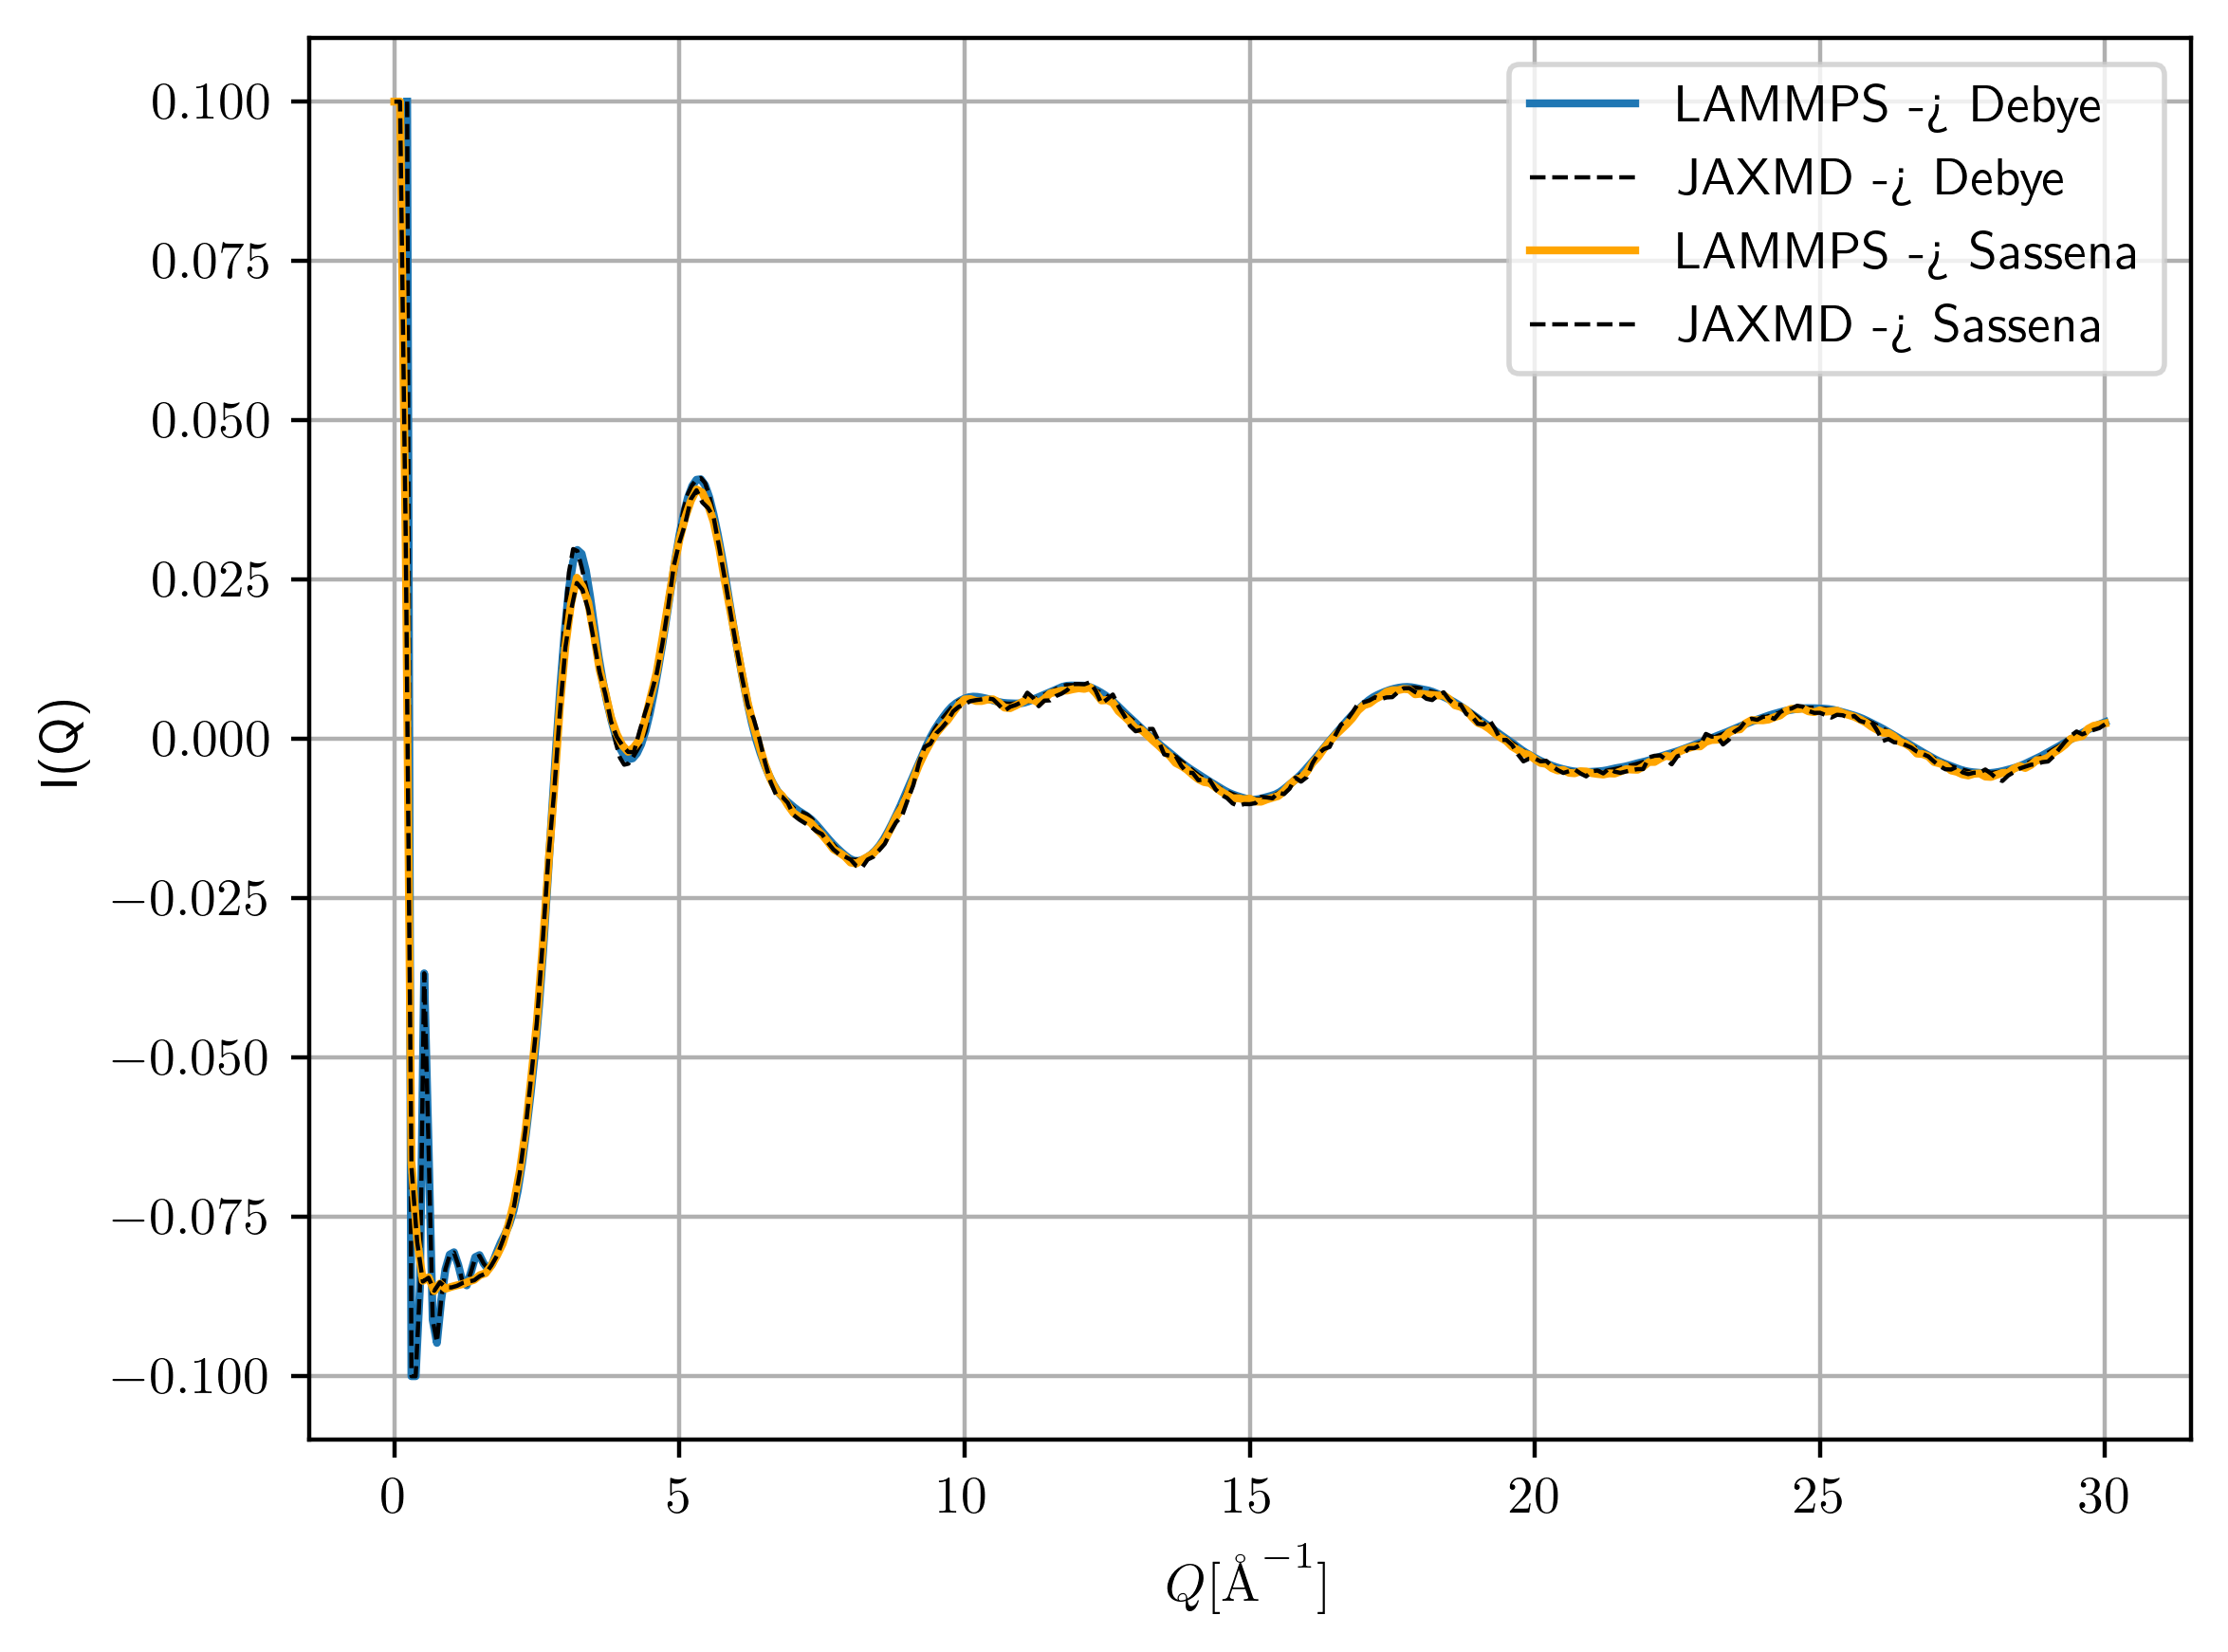

In [30]:
plt.plot(
    df_lammps_then_debye["Q"], 
    np.clip(df_lammps_then_debye["I_Q"], clip_min, clip_max), 
    label="LAMMPS -> Debye",
    )

plt.plot(
    df_jaxmd_then_debye["Q"], 
    np.clip(df_jaxmd_then_debye["I_Q"], clip_min, clip_max), 
    label="JAXMD -> Debye",
    c="black",
    linewidth=0.8,
    linestyle="dashed"
    )



plt.plot(
    df_lammps_then_sassena["Q"], 
    np.clip(df_lammps_then_sassena["I_Q"] * sassena_y_scale + sassena_y_offset, clip_min, clip_max), 
    label="LAMMPS -> Sassena",
    c="orange")

plt.plot(
    df_jaxmd_then_sassena["Q"], 
    np.clip(df_jaxmd_then_sassena["I_Q"] * sassena_y_scale + sassena_y_offset, clip_min, clip_max), 
    label="JAXMD -> Sassena",
    c="black",
    linewidth=0.8,
    linestyle="dashed"
    )

# plt.plot(
#     df_lammps_large_then_sassena["Q"], 
#     np.clip(df_lammps_large_then_sassena["I_Q"] * sassena_large_y_scale + sassena_large_y_offset, clip_min, clip_max), 
#     label="LAMMPS large -> Sassena",
#     #linestyle="dotted"
#     )


plt.xlabel("$Q [\\unit{\\per\\angstrom}]$")
plt.ylabel("I(Q)")
plt.legend()
plt.grid()
plt.show()

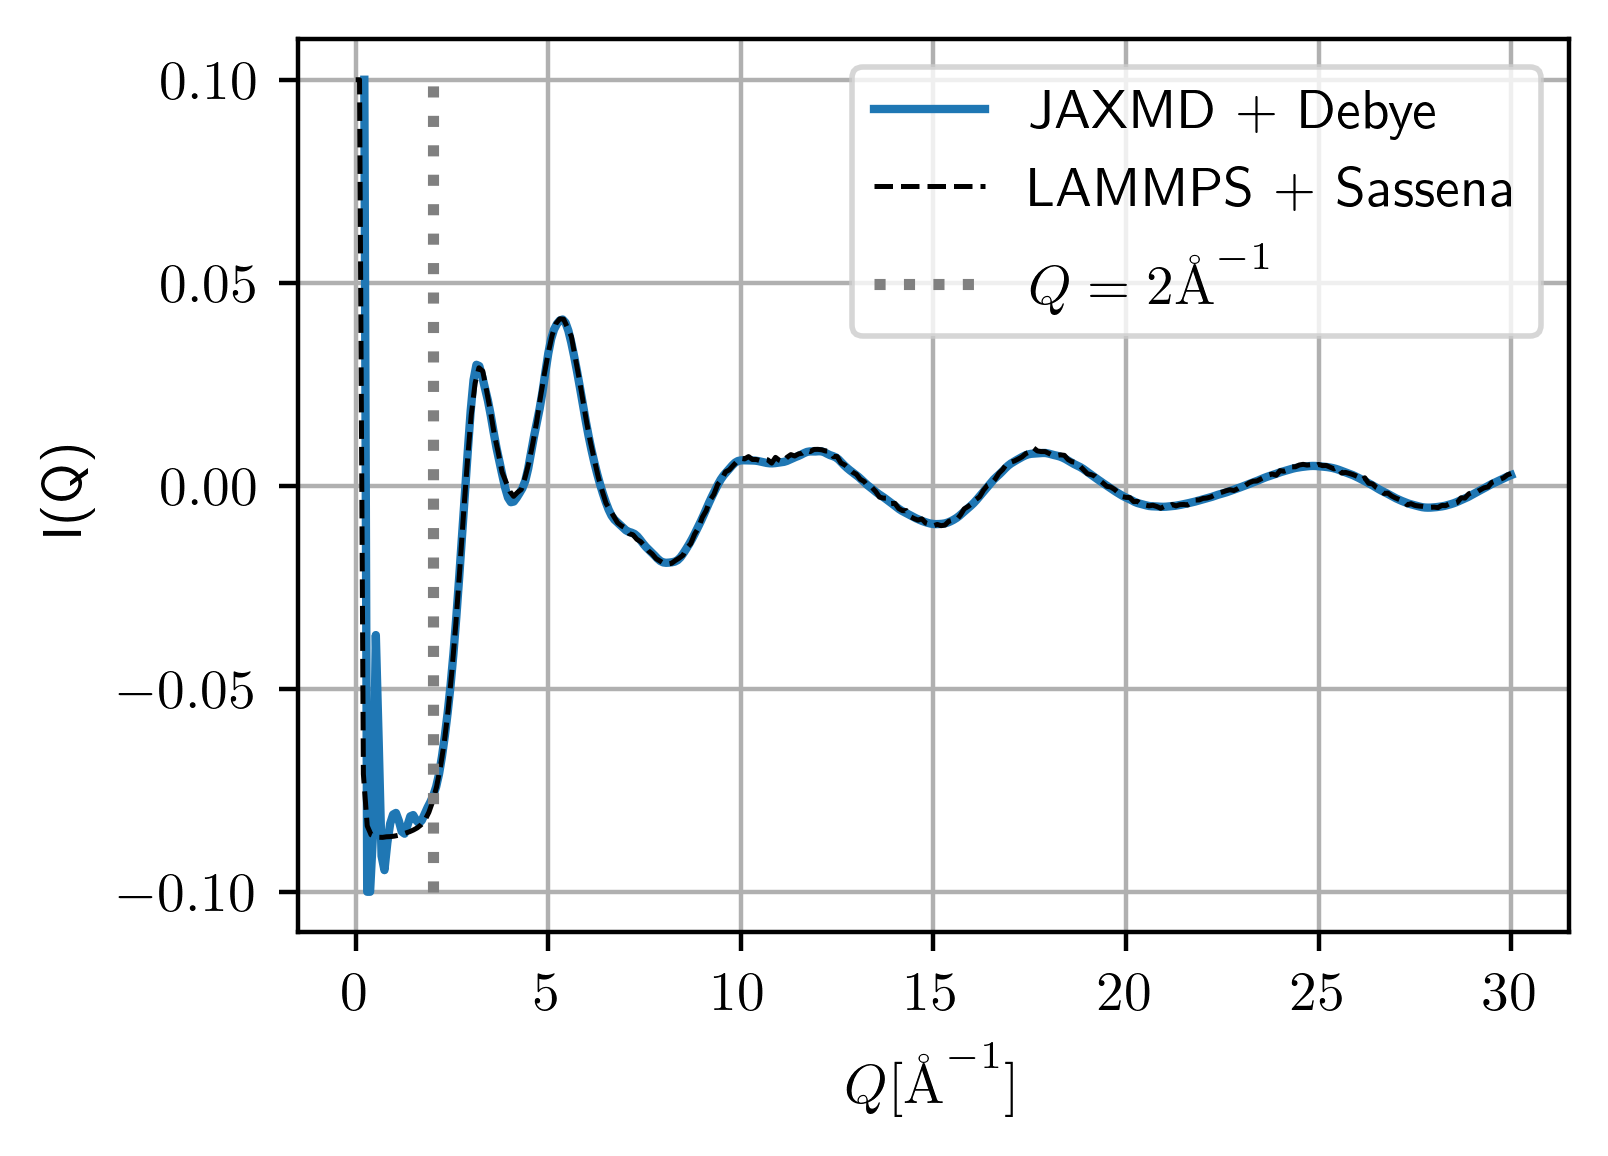

In [31]:
x2 = df_lammps_large_then_sassena["Q"]
y2 = df_lammps_large_then_sassena["I_Q"] * sassena_large_y_scale + sassena_large_y_offset

# plt.plot(
#     df_lammps_then_debye["Q"], 
#     np.clip(df_lammps_then_debye["I_Q"], clip_min, clip_max), 
#     label="LAMMPS + Debye",
#     )

plt.gcf().set_size_inches(4.1, 2.9)

plt.plot(
    df_jaxmd_then_debye["Q"], 
    np.clip(df_jaxmd_then_debye["I_Q"], clip_min, clip_max), 
    label="JAXMD + Debye"
    )

plt.plot(
    x2, 
    np.clip(y2, clip_min, clip_max), 
    label="LAMMPS + Sassena",
    c="black",
    linestyle="dashed",
    linewidth=0.9
    )

plt.plot(
    [2, 2],
    [clip_min, clip_max],
    linestyle="dotted",
    color="grey",
    linewidth=2,
    label="$Q = 2\\unit{\\per\\angstrom}$"
)


clip_y_min = -0.01
clip_y_max = 0.05
clip_x_min = 2.5
clip_x_max = 6

# plt.plot(
#     [clip_x_min, clip_x_max, clip_x_max, clip_x_min, clip_x_min], 
#     [clip_y_min, clip_y_min, clip_y_max, clip_y_max, clip_y_min], 
#     label="Zoom Box", color="grey", linestyle="dotted")

plt.xlabel("$Q [\\unit{\\per\\angstrom}]$")
plt.ylabel("I(Q)")
plt.legend()
plt.grid()
plt.savefig("../plots/jaxmddebye_vs_lammpsassena.svg")
plt.show()

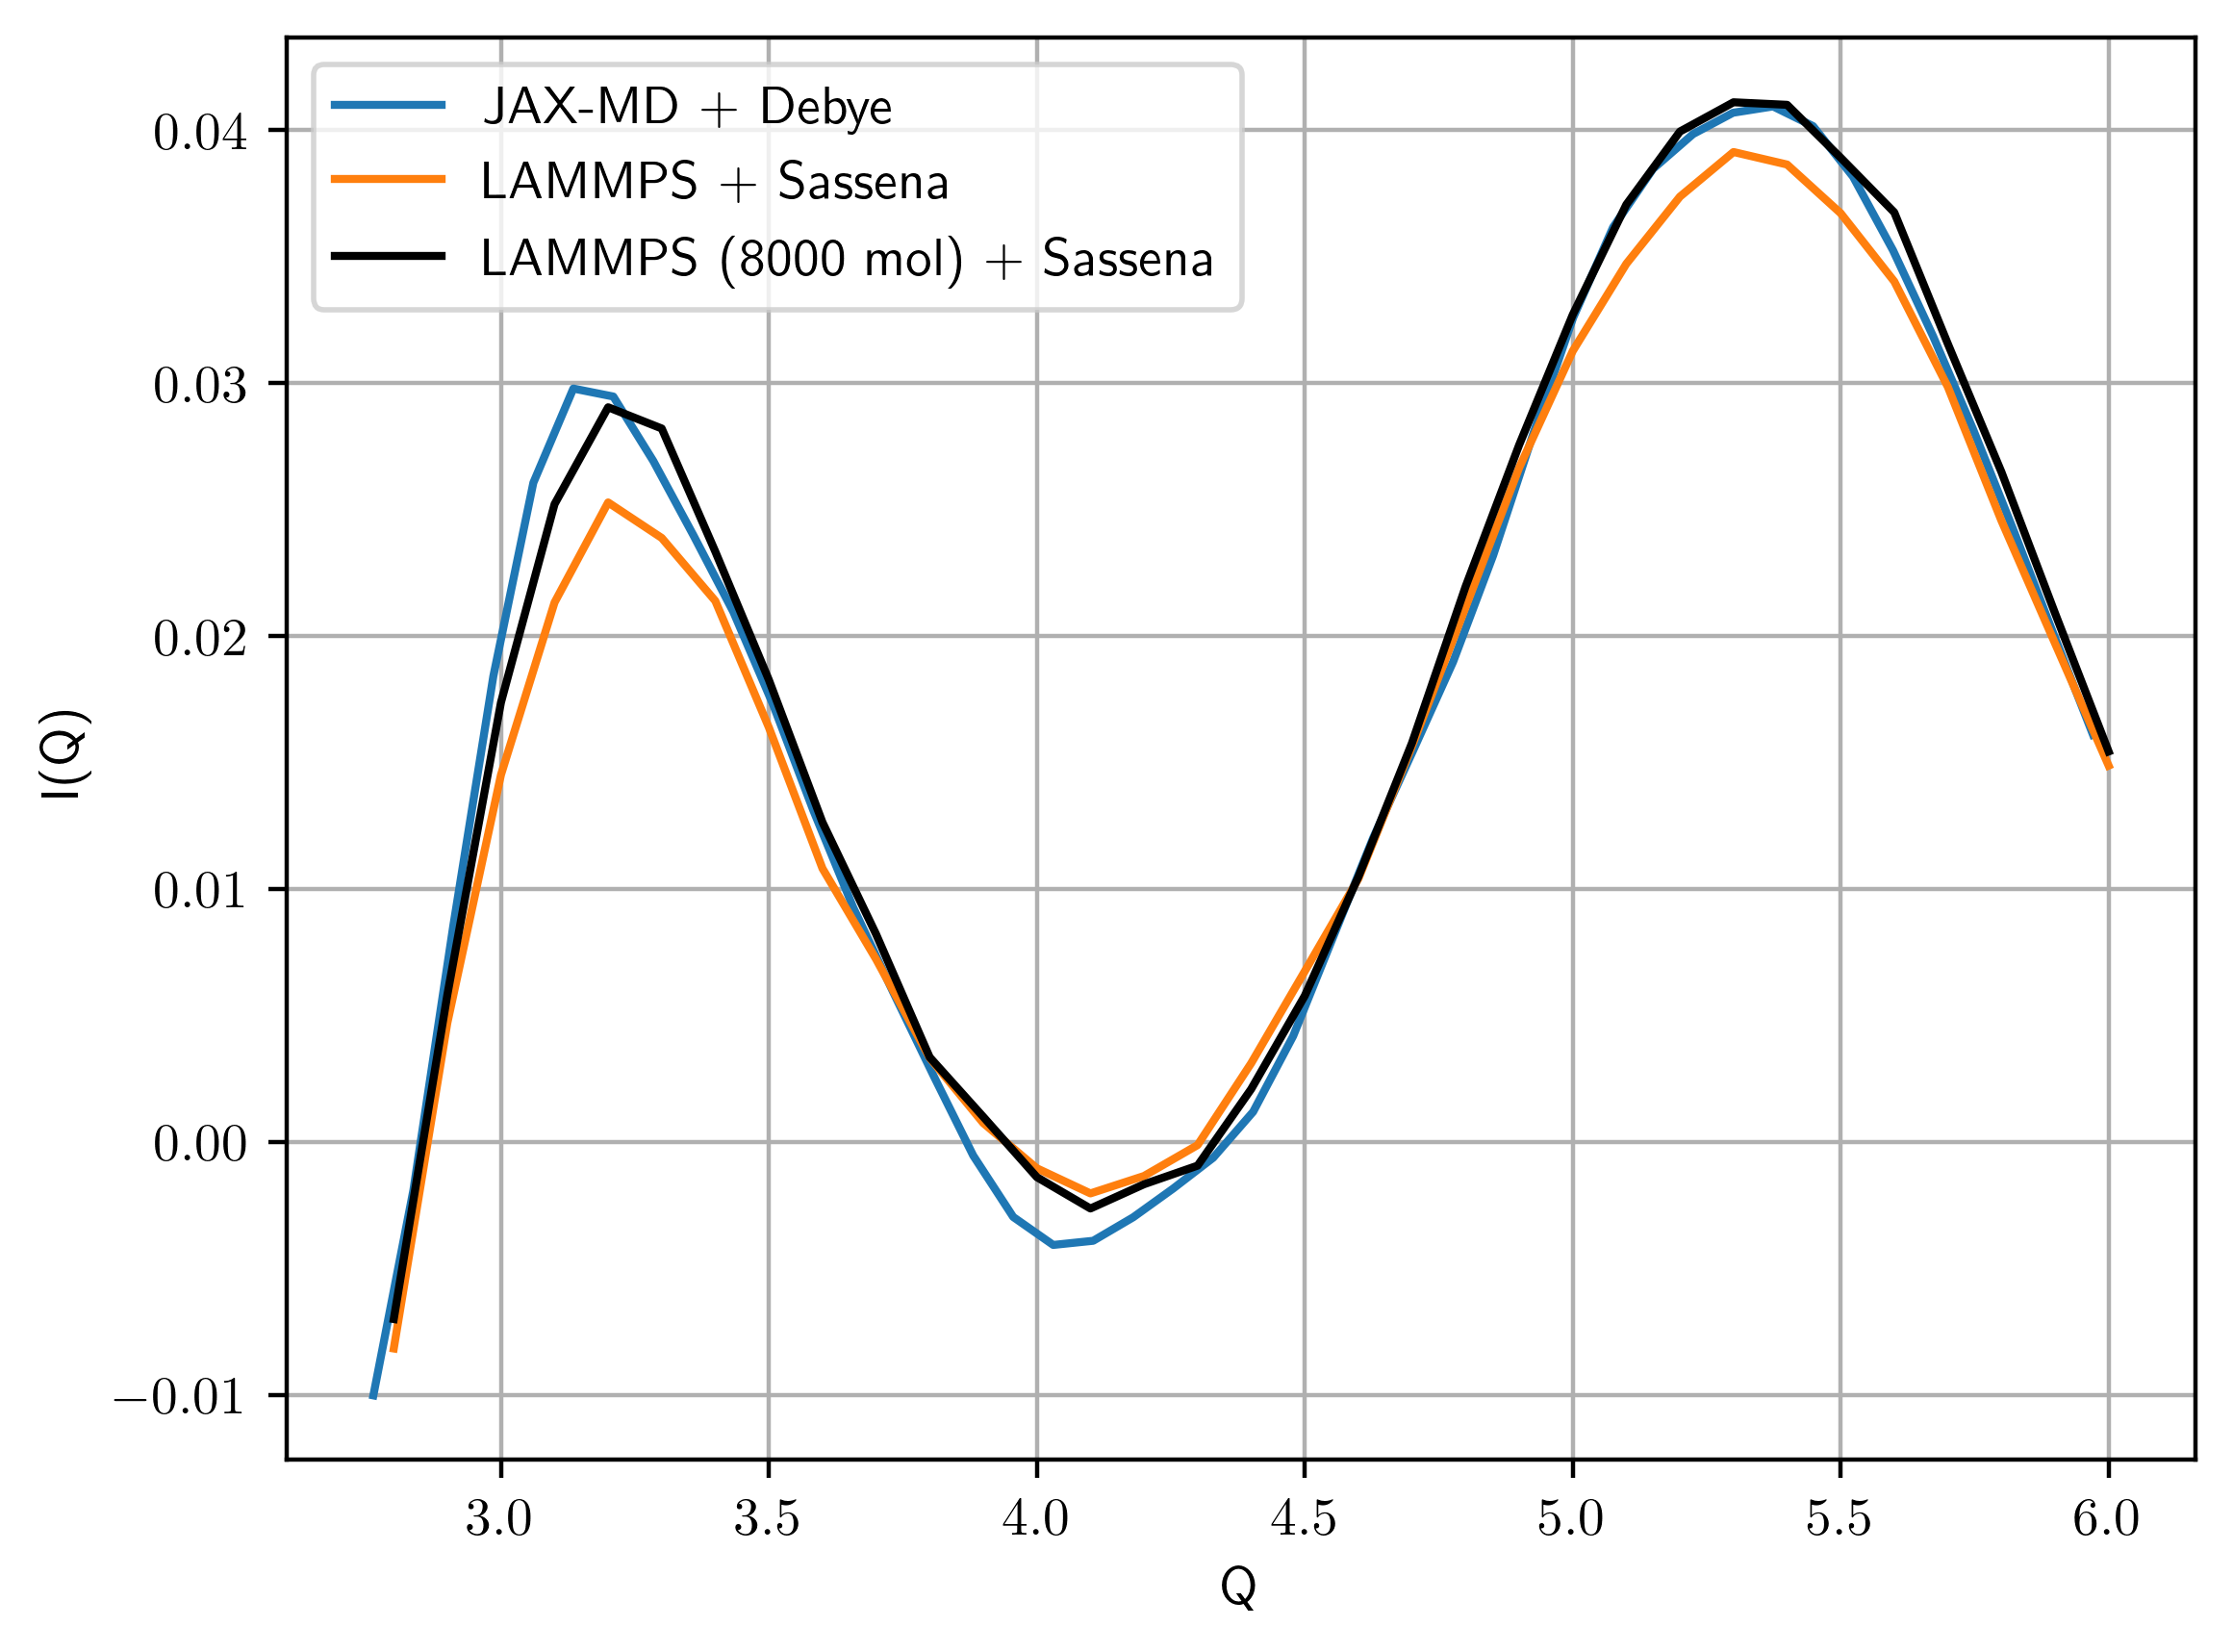

In [32]:
clipped_pattern1 = np.clip(df_jaxmd_then_debye["I_Q"], clip_y_min, clip_y_max)[34:78]
clipped_x1 = np.clip(df_jaxmd_then_debye["Q"], clip_x_min, clip_x_max)[34:78]

clipped_pattern2 = np.clip(y2, clip_y_min, clip_y_max)[28:61]
clipped_x2 = np.clip(x2, clip_x_min, clip_x_max)[28:61]

x3 = df_lammps_then_sassena["Q"]
y3 = df_lammps_then_sassena["I_Q"] * sassena_y_scale + sassena_y_offset
clipped_pattern3 = np.clip(y3, clip_y_min, clip_y_max)[28:61]
clipped_x3 = np.clip(x3, clip_x_min, clip_x_max)[28:61]

plt.plot(clipped_x1, clipped_pattern1, label="JAX-MD + Debye")
plt.plot(clipped_x3, clipped_pattern3, label="LAMMPS + Sassena")
#plt.scatter(clipped_x1, clipped_pattern1, c="tab:red")
#plt.scatter(clipped_x1, clipped_pattern1, c="tab:red")
plt.plot(clipped_x2, clipped_pattern2, label="LAMMPS (8000 mol) + Sassena", c="black")
#plt.scatter(clipped_x2, clipped_pattern2, c="tab:blue")
#plt.scatter(clipped_highres_x, clipped_highres_pattern, c="orange")

plt.legend(loc="upper left")
plt.ylabel("I(Q)")
plt.xlabel("Q")
plt.grid()
plt.show()
